<h1>3ª Etapa do Processo Seletivo</h1>
<br>
Esta apresentação foi criada por <b>Alan Pereira de Sá</b>. Aqui irei realizar algumas analises sobre os dados da base de dados enviada.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import roman
plt.style.use('ggplot')

In [2]:
xlsx = pd.ExcelFile('FGV_CPDE_3EPS\\base_de_dados.xlsx')
dataset = pd.read_excel(xlsx, 'Dados')
dataset = dataset.dropna()

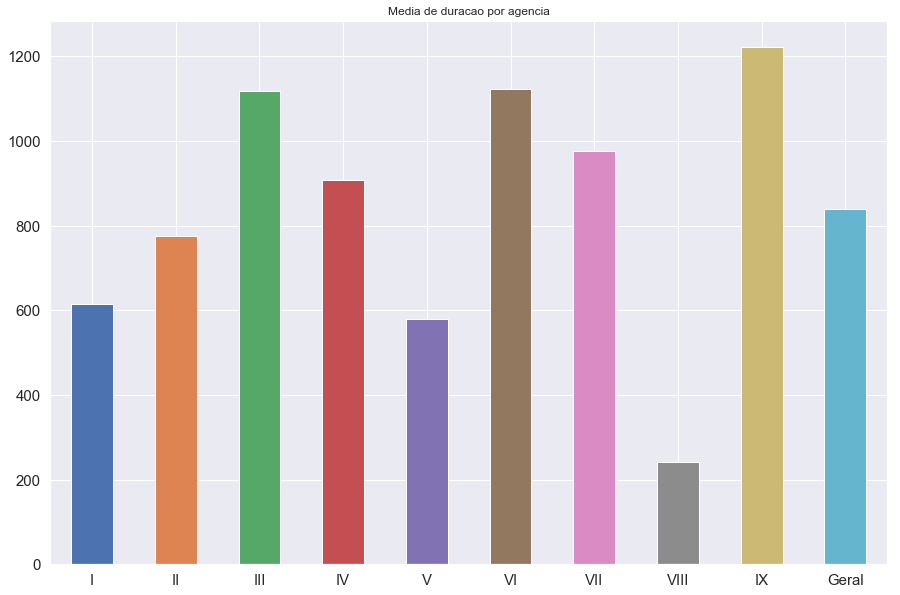

In [12]:
dataset['AgenciaInt'] = dataset['Agencia'].apply(lambda x: roman.fromRoman(x))
rm = ['N/D','N/A']
dataset = dataset[~dataset['Data_Encerramento'].isin(rm)]
dataset['Tempo_Duracao'] = pd.to_numeric(dataset['Data_Encerramento']) -  pd.to_numeric(dataset['Data_Autuacao'])
d = dataset.groupby(['AgenciaInt']).mean()
m = d['Tempo_Duracao']
m = pd.Series(m.index.values, index=m)
m = m.apply(roman.toRoman)
m = pd.Series(m.index.values, index=m)
m = m.append(pd.Series([m.mean()], index=['Geral']))
sns.set()
m.plot(kind='bar', title='Media de duracao por agencia', fontsize=15,rot=0,figsize=(15,10))
plt.show()